In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns   
import statsmodels.api as sm
from dtreeviz.trees import *
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from scipy.stats import f_oneway 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import SVG
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%matplotlib inline

In [2]:
def date_attributes (my_date):
  print(type(my_date))
  print('Default Format ',my_date)
  print('Day ',my_date.day)
  print('Month ',my_date.month)
  print('year ',my_date.year)
  print('Format Date/Month/Year ',my_date.strftime("%d/%m/%Y"))
  print('Format Month/Date/Year ',my_date.strftime("%m/%d/%Y"))
  print('Format Month(Texual)/Date/Year ',my_date.strftime("%B/%d/%Y"))
  print('Format Year/Month/Date ',my_date.strftime("%Y/%m/%d"))
  return
my_date = datetime(year=2015, month=7, day=4)
date_attributes(my_date)
date_attributes(datetime.now())
sys_date_time=pd.to_datetime(datetime.now())
date_attributes(sys_date_time)
print (type(sys_date_time))
print (sys_date_time)

<class 'datetime.datetime'>
Default Format  2015-07-04 00:00:00
Day  4
Month  7
year  2015
Format Date/Month/Year  04/07/2015
Format Month/Date/Year  07/04/2015
Format Month(Texual)/Date/Year  July/04/2015
Format Year/Month/Date  2015/07/04
<class 'datetime.datetime'>
Default Format  2022-12-27 19:05:08.706719
Day  27
Month  12
year  2022
Format Date/Month/Year  27/12/2022
Format Month/Date/Year  12/27/2022
Format Month(Texual)/Date/Year  December/27/2022
Format Year/Month/Date  2022/12/27
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
Default Format  2022-12-27 19:05:08.707796
Day  27
Month  12
year  2022
Format Date/Month/Year  27/12/2022
Format Month/Date/Year  12/27/2022
Format Month(Texual)/Date/Year  December/27/2022
Format Year/Month/Date  2022/12/27
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2022-12-27 19:05:08.707796


In [3]:
features = pd.read_csv('features_dataset.csv')
sales = pd.read_csv('sales_dataset.csv')
stores = pd.read_csv('stores_dataset.csv')

In [4]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [6]:
features['Date']= pd.to_datetime(features['Date'], format="%d/%m/%Y")
features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [7]:
features['Date'].value_counts()

2010-02-05    45
2012-04-13    45
2012-04-27    45
2012-05-04    45
2012-05-11    45
              ..
2011-04-15    45
2011-04-22    45
2011-04-29    45
2011-05-06    45
2013-07-26    45
Name: Date, Length: 182, dtype: int64

Sum of NA values in features by column. MarkDown data is only available after November 2011, and is not available for all stores all the time. Any missing value was marked with an NA and has been replaced with 0.

In [8]:
print(features.isna().sum())

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [9]:
features[["MarkDown1","MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]] = features[["MarkDown1","MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]].fillna(0)
print(features)

      Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1 2010-02-05        42.31       2.572       0.00       0.00   
1         1 2010-02-12        38.51       2.548       0.00       0.00   
2         1 2010-02-19        39.93       2.514       0.00       0.00   
3         1 2010-02-26        46.63       2.561       0.00       0.00   
4         1 2010-03-05        46.50       2.625       0.00       0.00   
...     ...        ...          ...         ...        ...        ...   
8185     45 2013-06-28        76.05       3.639    4842.29     975.03   
8186     45 2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45 2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45 2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45 2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0          0.00       0.00       0.00  211.096

In [10]:
features[["CPI","Unemployment"]] = features[["CPI","Unemployment"]].fillna(features.mean())
print(features)

      Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1 2010-02-05        42.31       2.572       0.00       0.00   
1         1 2010-02-12        38.51       2.548       0.00       0.00   
2         1 2010-02-19        39.93       2.514       0.00       0.00   
3         1 2010-02-26        46.63       2.561       0.00       0.00   
4         1 2010-03-05        46.50       2.625       0.00       0.00   
...     ...        ...          ...         ...        ...        ...   
8185     45 2013-06-28        76.05       3.639    4842.29     975.03   
8186     45 2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45 2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45 2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45 2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0          0.00       0.00       0.00  211.096

C:\Users\mtoy\AppData\Local\Temp\ipykernel_1696\808756144.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  features[["CPI","Unemployment"]] = features[["CPI","Unemployment"]].fillna(features.mean())


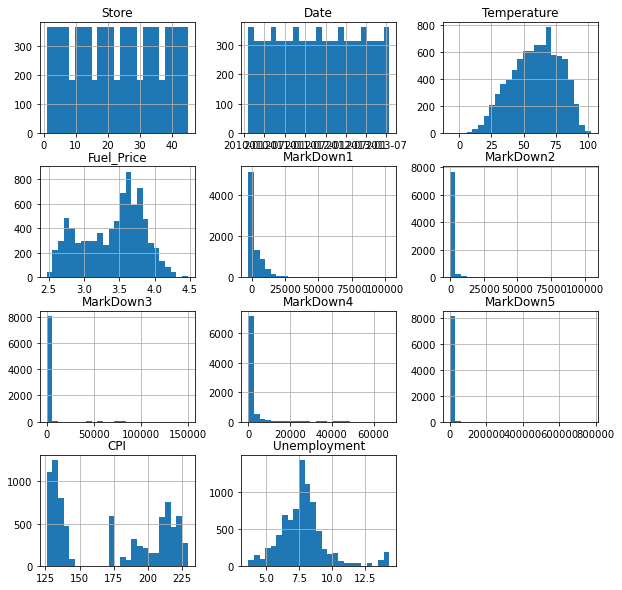

In [11]:
features.hist(bins=25,figsize=(10,10))
plt.show()

<AxesSubplot:>

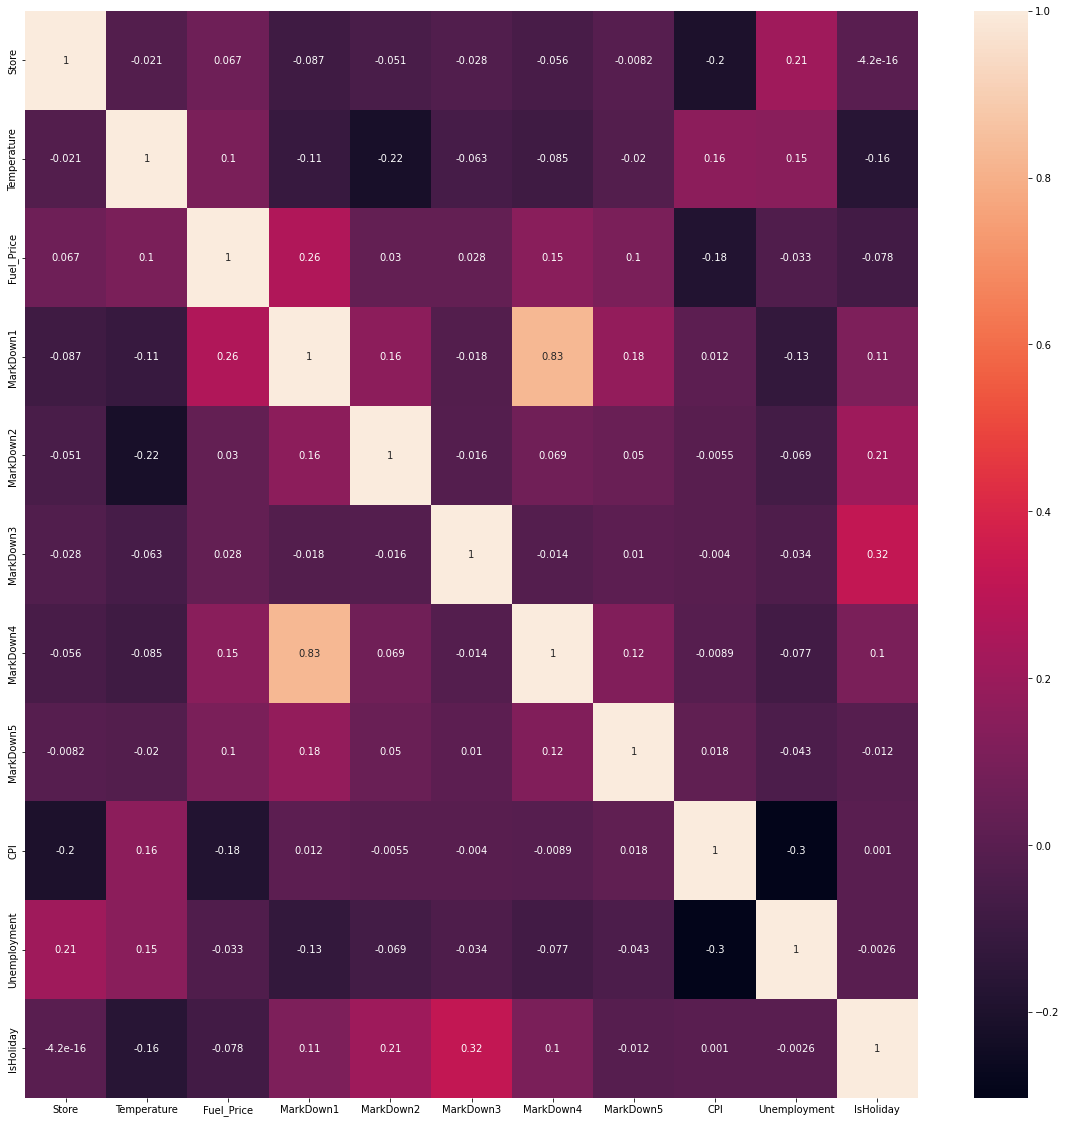

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(features.corr(),annot=True)

In [13]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [14]:
sales['Date']= pd.to_datetime(sales['Date'], format="%d/%m/%Y")
sales.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [15]:
print(sales.isna().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


In [16]:
sales_avg = sales.groupby(by=["Store","Dept"])["Weekly_Sales"].mean()
sales_avg

Store  Dept
1      1       22513.322937
       2       46102.090420
       3       13150.478042
       4       36964.154476
       5       24257.941119
                   ...     
45     94       3690.272090
       95      52896.166643
       96          2.970000
       97       6466.961888
       98        561.239037
Name: Weekly_Sales, Length: 3331, dtype: float64

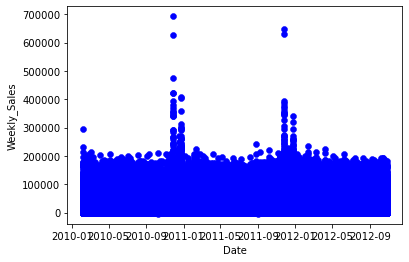

In [17]:
x = sales["Date"]
y = sales["Weekly_Sales"]
plt.scatter(x, y, c ="blue", linewidths = .5)
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.show()

In [18]:
sales_max = sales.groupby(by="Date")["Weekly_Sales"].max()
sales_max_head = sales_max.sort_values(ascending = False).head(10)
sales_max_head

Date
2010-11-26    693099.36
2011-11-25    649770.18
2010-12-24    406988.63
2011-12-23    341308.00
2010-02-05    293966.05
2010-12-17    268789.69
2011-08-26    241120.00
2012-02-10    233140.32
2011-12-09    227088.13
2012-04-06    224917.94
Name: Weekly_Sales, dtype: float64

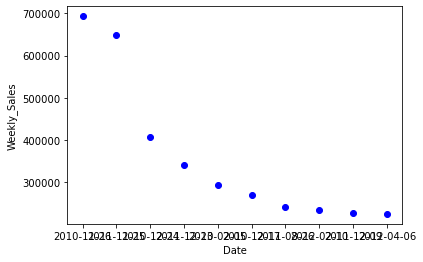

In [19]:
x = ["2010-11-26", "2011-11-25", "2010-12-24", "2011-12-23", "2010-02-05", "2010-12-17", "2011-08-26", "2012-02-10", "2011-12-09", "2012-04-06"]
y = [693099.36, 649770.18, 406988.63, 341308.00, 293966.05, 268789.69, 241120.00, 233140.32, 227088.13, 224917.94]
plt.scatter(x, y, c ="blue")
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.show()

In [20]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [21]:
print(stores.isna().sum())

Store    0
Type     0
Size     0
dtype: int64


C:\Users\mtoy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


A    22
B    17
C     6
Name: Type, dtype: int64

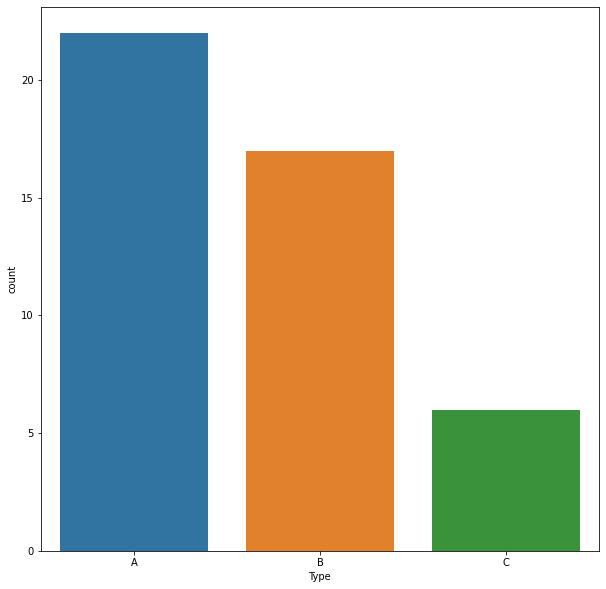

In [22]:
store_type = plt.figure(figsize=(10,10))
sns.countplot(stores["Type"])
stores["Type"].value_counts()

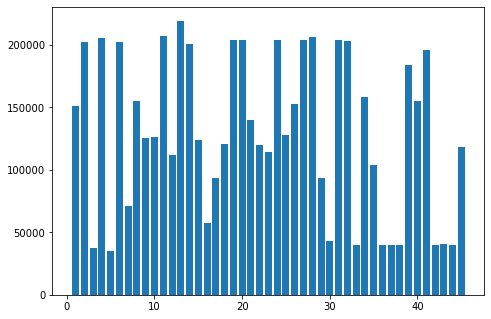

In [23]:
store_size = plt.figure()
ax = store_size.add_axes([0,0,1,1])
store = stores["Store"]
size = stores["Size"]
ax.bar(store,size)
plt.show()

# Unsupervised ML Sales Prediction

In [24]:
all_features = features.merge(stores, on = 'Store')
all_features = all_features.merge(sales, on = ['Store','Date','IsHoliday'])
all_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,93,2487.80
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,94,5203.31
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,95,56017.47
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,97,6817.48


In [25]:
all_features["Date"] = pd.to_datetime(all_features["Date"])

In [26]:
all_features["Date"] = all_features["Date"].dt.strftime('%Y-%m')

In [27]:
all_features = all_features.sort_values(by = ["Date"])
all_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1,24924.50
237300,25,2010-02,24.16,2.745,0.0,0.0,0.0,0.0,0.0,204.432100,8.187,False,B,128107,97,2526.21
237299,25,2010-02,24.16,2.745,0.0,0.0,0.0,0.0,0.0,204.432100,8.187,False,B,128107,95,39593.42
237298,25,2010-02,24.16,2.745,0.0,0.0,0.0,0.0,0.0,204.432100,8.187,False,B,128107,94,2310.02
237297,25,2010-02,24.16,2.745,0.0,0.0,0.0,0.0,0.0,204.432100,8.187,False,B,128107,93,765.04


In [28]:
all_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     421570 non-null  float64
 5   MarkDown2     421570 non-null  float64
 6   MarkDown3     421570 non-null  float64
 7   MarkDown4     421570 non-null  float64
 8   MarkDown5     421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


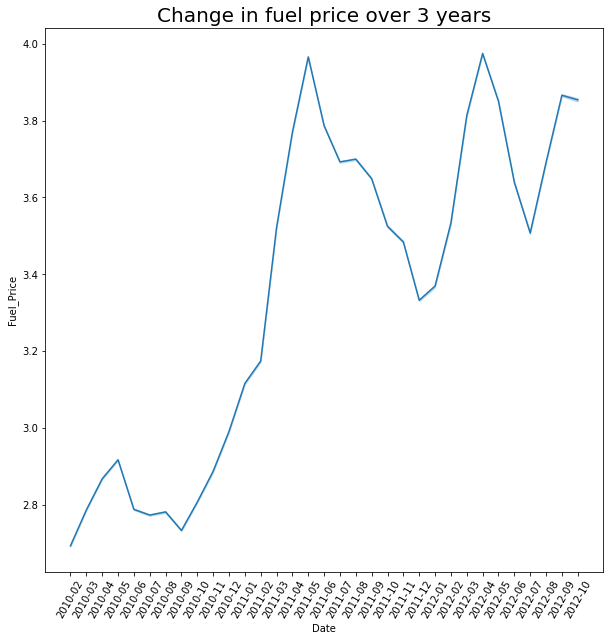

In [29]:
plot_no = 1
_ = plt.subplots(figsize = (10,10))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = all_features, x = "Date",y = "Fuel_Price")
_ = plt.title('Change in fuel price over 3 years', fontsize=20)
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

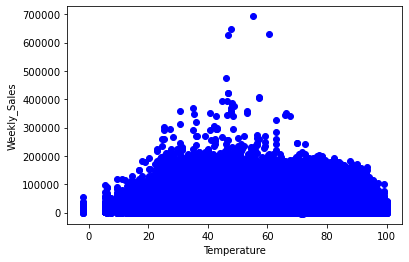

In [30]:
x = all_features["Temperature"]
y = all_features["Weekly_Sales"]
plt.scatter(x, y, c ="blue")
plt.xlabel("Temperature")
plt.ylabel("Weekly_Sales")
plt.show()

Decided not to use GMM
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)

cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['cluster'] = cluster_labels

for k in range(0,n_clusters):
    data = X[X["cluster"]==k]
    plt.scatter(all_features["Unemployment"],all_features["CPI"])
plt.title("Guassian Mixture Model")    
plt.ylabel("CPI")
plt.xlabel("Unemployment")
plt.show()

In [62]:
spectral_cluster_model= SpectralClustering(
    n_clusters=5, 
    random_state=25, 
    n_neighbors=8, 
    affinity='nearest_neighbors'
)

C:\Users\mtoy\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


[Text(0.5, 1.0, 'Spectral Clustering')]

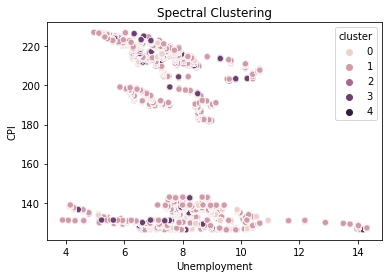

In [63]:
X['cluster'] = spectral_cluster_model.fit_predict(all_features[["Unemployment", "CPI"]])
fig, ax = plt.subplots()
sns.scatterplot(x=all_features["Unemployment"], y=all_features["CPI"], data=X, hue="cluster", ax=ax)
ax.set(title='Spectral Clustering')